# Twitter Fake News Analysis

## Option 1: Fetch Tweets Using Tweepy ##

First we will instantiate the Twitter API.  To do so, you must create a Twitter app and obtain a consumer key, consumer secret, access token, and access secret.  

In [2]:
import json
import tweepy

# Insert your keys and secrets here.
# https://www.digitalocean.com/community/tutorials/how-to-authenticate-a-python-application-with-twitter-using-tweepy-on-ubuntu-14-04

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

Next, we will use the Tweepy cursor API to fetch some recent tweets corresponding to a particular search term. Note that this is a fairly slow process, so you might want to do this every once in awhile and then write your Tweets to disk as a JSON file once you have a good working set.

In [3]:
data = []
limit = 100
query = 'news'

for tweet in tweepy.Cursor(api.search, q=query, lang='en').items(limit):
    data.append(tweet._json)

You can always check how many queries you have left using rate_limit_status() method

In [4]:
api.rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 149, 'reset': 1561061467}}

Once you have either fetched or loaded Tweets into the data structure, you can have a look at what is in the JSON file.

In [68]:
with open('./news.json', 'w') as f:  
    json.dump(data, f)

## Opption 2: Import Tweets from JSON

If you have an existing file of JSON tweets, you can import Teets from a saved JSON file, which you might have previously gathered using RTweet or Tweepy.

In [71]:
import json
from pprint import pprint

with open('./news.json') as f:
    data = json.load(f)

In [72]:
print(data[3]["entities"]["urls"][0]["expanded_url"])
print(json.dumps(data[2], indent=4, sort_keys=True))

https://www.yahoo.com/news/latest-pelosi-says-us-cannot-151235909.html?.tsrc=fauxdal
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jun 20 20:02:54 +0000 2019",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/drc29mV42x",
                "expanded_url": "https://twitter.com/enews/status/1141538039409324032/video/1",
                "id": 1141537021716025344,
                "id_str": "1141537021716025344",
                "indices": [
                    112,
                    135
                ],
                "media_url": "http://pbs.twimg.com/amplify_video_thumb/1141537021716025344/img/mYKUecn67SSCFgJ6.jpg",
                "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/1141537021716025344/img/mYKUecn67SSCFgJ6.jpg",
                "sizes": {
                    "large": {
                        "h": 480,
                        "resize": "fit",
             

## Create Histogram of Common Domains in Tweets

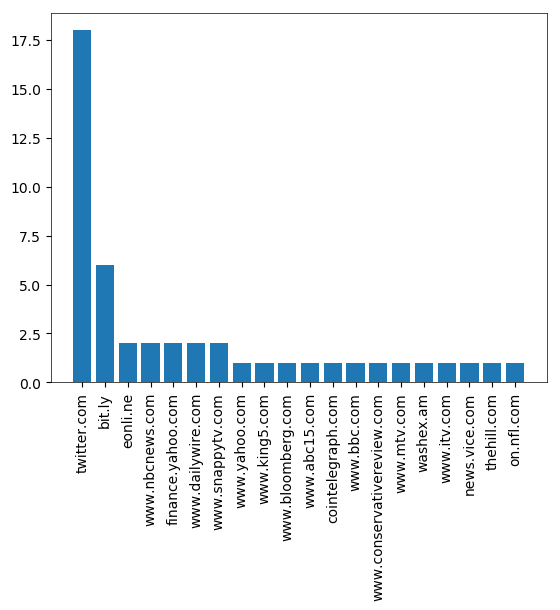

In [73]:
%matplotlib inline

import re
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


domains = defaultdict(int)
sorted_domains = list()
sorted_counts = list()

# keep track of whether each domain was linked using HTTPS
https = {}

for d in data:
    if (len(d["entities"]["urls"]) < 1):
        continue
    for u in d["entities"]["urls"]:
        url = str(d["entities"]["urls"][0]["expanded_url"])
        dom = re.match(r'(http.*)\/\/(.*?)\/', url)
        if dom:
            domain = dom.group(2)
            domains[domain] += 1
            https[domain] = (dom.group(1) == 'https:')
        
sdomains = sorted(domains, key=domains.get, reverse=True)

for w in sdomains:
    sorted_domains.append(w)
    sorted_counts.append(domains[w])
    # this will print all of the domains and their counts.
    # the tail may be the most interesting part
    # print w, domains[w]

# plot the most popular domains that show up in URLs
# plot shows only the top 10. domains has all of the counts

x = sorted_domains[:20]
y = sorted_counts[:20]

plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.show()

## Explore Characteristics of Each Domain Name

First we'll extract the following characteristics of the domain names in each Tweet:
(1) The IP addresses that each domain resolves to
(2) The DNS nameservers that each domain is authoritative for

In [74]:
host_countries = dict()
ips = dict()
nameservers = dict()
ns_ips = dict()

### A Record Lookup

In [75]:
# requires: dnspython library

import dns.resolver

# Lookup IP addresses / A Records of Domain Names
for qname in sdomains:
    ips[qname] = list()
    
    try:
        answers = dns.resolver.query(qname, 'A')
    except dns.resolver.NXDOMAIN as e:
        # the domain does not exist so dns resolutions remain empty
        pass
    except dns.resolver.NoNameservers as e:
        # no nameservers are returned
        pass
    except dns.resolver.NoAnswer as e:
        # the resolver is not answering so dns resolutions remain empty
        pass

    for rdata in answers:
        #print qname, domains[qname], rdata.address
        ips[qname].append(rdata.address)
        
print(ips['twitter.com'][0])

104.244.42.1


In [76]:
# dictionary of all of the DNS domain names -> IP addresses that host the websites
print(ips)

{'twitter.com': ['104.244.42.1', '104.244.42.129'], 'bit.ly': ['67.199.248.10', '67.199.248.11'], 'eonli.ne': ['67.199.248.13', '67.199.248.12'], 'www.nbcnews.com': ['2.21.100.27'], 'finance.yahoo.com': ['102.165.180.205'], 'www.dailywire.com': ['104.20.46.182', '104.20.47.182'], 'www.snappytv.com': ['54.245.111.74', '54.214.26.218', '54.244.234.121'], 'www.yahoo.com': ['87.248.98.7', '87.248.98.8'], 'www.king5.com': ['104.127.122.231'], 'www.bloomberg.com': ['151.101.225.73'], 'www.abc15.com': ['143.204.68.229', '143.204.68.245', '143.204.68.238', '143.204.68.22'], 'cointelegraph.com': ['104.20.65.243', '104.20.66.243'], 'www.bbc.com': ['151.101.224.81'], 'www.conservativereview.com': ['34.74.26.136'], 'www.mtv.com': ['2.21.101.34'], 'washex.am': ['67.199.248.12', '67.199.248.13'], 'www.itv.com': ['2.21.235.85'], 'news.vice.com': ['151.101.225.132'], 'thehill.com': ['151.101.2.217', '151.101.130.217', '151.101.194.217', '151.101.66.217'], 'on.nfl.com': ['74.217.253.90'], 'www.amazon.c

### NS Record Lookup

In [77]:
# Lookup NS Records for Each Domain Name

for qname in sdomains:
    nameservers[qname] = list()
    
    try:
        answer = dns.resolver.query(qname, 'NS', raise_on_no_answer=False)
    except dns.resolver.NXDOMAIN as e:
        # the domain does not exist so dns resolutions remain empty
        pass
    except dns.resolver.NoNameservers as e:
        # no nameservers are returned
        pass
    except dns.resolver.NoAnswer as e:
        # the resolver is not answering so dns resolutions remain empty
        pass
    
    if answer.rrset is not None:        
        for ns in answer.rrset.items:
              fqdn = ns.to_text().upper()
              nameservers[qname].append(fqdn)

In [78]:
# dictionary of all of the DNS domain names -> DNS Namservers
print(nameservers)

{'twitter.com': ['D.R06.TWTRDNS.NET.', 'A.R06.TWTRDNS.NET.', 'D01-02.NS.TWTRDNS.NET.', 'NS4.P34.DYNECT.NET.', 'C.R06.TWTRDNS.NET.', 'NS2.P34.DYNECT.NET.', 'D01-01.NS.TWTRDNS.NET.', 'B.R06.TWTRDNS.NET.', 'NS3.P34.DYNECT.NET.', 'NS1.P34.DYNECT.NET.'], 'bit.ly': ['NS-CLOUD-C1.GOOGLEDOMAINS.COM.', 'NS-CLOUD-C2.GOOGLEDOMAINS.COM.', 'NS-CLOUD-C3.GOOGLEDOMAINS.COM.', 'NS-CLOUD-C4.GOOGLEDOMAINS.COM.', 'NS-1372.AWSDNS-43.ORG.', 'NS-1766.AWSDNS-28.CO.UK.', 'NS-276.AWSDNS-34.COM.', 'NS-705.AWSDNS-24.NET.'], 'eonli.ne': ['NS-561.AWSDNS-06.NET.', 'NS-1938.AWSDNS-50.CO.UK.', 'NS-21.AWSDNS-02.COM.', 'NS-1401.AWSDNS-47.ORG.'], 'www.nbcnews.com': [], 'finance.yahoo.com': [], 'www.dailywire.com': [], 'www.snappytv.com': [], 'www.yahoo.com': [], 'www.king5.com': [], 'www.bloomberg.com': [], 'www.abc15.com': ['NS-1350.AWSDNS-40.ORG.', 'NS-530.AWSDNS-02.NET.', 'NS-168.AWSDNS-21.COM.', 'NS-2003.AWSDNS-58.CO.UK.'], 'cointelegraph.com': ['JASON.NS.CLOUDFLARE.COM.', 'TARA.NS.CLOUDFLARE.COM.'], 'www.bbc.com': [

### Map Each IP Address to its corresponding ISP (AS Number)

First let's test the Pyasn library.

In [79]:
# requires: pyasn (pip install pyasn). You may need to install this manually, as Anaconda doesn't seem to have it.

import pyasn

asndb = pyasn.pyasn('./ipasn.dat')
asndb.lookup('8.8.8.8')

(15169, '8.8.8.0/24')

### Map Each DNS Nameserver to Its Corresponding IP Address

In [15]:
for qname in nameservers.keys():
    
    ns_ips[qname] = list()
    
    for i in range(len(nameservers[qname])):
        nsname = nameservers[qname][i]
        try:
            answers = dns.resolver.query(nsname, 'A')
        except dns.resolver.NXDOMAIN as e:
            # the domain does not exist so dns resolutions remain empty
            pass
        except dns.resolver.NoNameservers as e:
            # no nameservers are returned
            pass
        except dns.resolver.NoAnswer as e:
            # the resolver is not answering so dns resolutions remain empty
            pass

        for rdata in answers:
            ns_ips[qname].append(rdata.address)

### Create a vector of features

You should feel free to add your own features here.

In [16]:
for qname in ns_ips.keys():
    for i in range(len(ips[qname])):
        print(qname, domains[qname], len(ips[qname]), asndb.lookup(ips[qname][i])[0])
        break

twitter.com 18 1 13414
bit.ly 6 2 395224
eonli.ne 2 2 395224
www.nbcnews.com 2 1 20940
finance.yahoo.com 2 1 10310
www.dailywire.com 2 2 13335
www.snappytv.com 2 3 16509
www.yahoo.com 1 2 34010
www.king5.com 1 1 11845
www.bloomberg.com 1 1 54113
www.abc15.com 1 4 16509
cointelegraph.com 1 2 13335
www.bbc.com 1 1 54113
www.conservativereview.com 1 1 None
www.mtv.com 1 1 20940
washex.am 1 2 395224
www.itv.com 1 1 37457
news.vice.com 1 1 54113
thehill.com 1 4 54113
on.nfl.com 1 1 10913
www.amazon.com 1 1 16509
2wsb.tv 1 2 395224
blbrd.cm 1 1 10913
www.cbc.ca 1 1 11845
trib.al 1 3 14618
hill.cm 1 1 14618
news.abs-cbn.com 1 2 13335
www.myallies.com 1 1 6830
www.theguardian.com 1 1 54113
www.aninews.in 1 1 16509
www.express.co.uk 1 4 None
www.thehindu.com 1 1 20940
vrscout.com 1 1 15169
apple.news 1 1 16625
www.news24.com 1 2 13335
www.baltimoresun.com 1 1 20940
a.msn.com 1 1 8068


### Get Some Fake News Labels

I used the kaggle dataset, which you can obtain from here:
https://github.com/bradmiro/fake_news_detector

and quickly post-processed it with perl to get some domains:

cut -f 10 -d ',' formatted_kaggle_training_data.csv | perl -e 'while (<>) {if ($_ =~ /^[a-z]*\.(net|com|org)$/) {print "$_"}}' | uniq''

In [20]:
fake = defaultdict(int)

with open('./fake-news-urls.txt') as f:
    for l in f.readlines():
        fake[l.strip()] = 1
        
# add some examples from above for 'fake' from above
fake['www.myallies.com'] = 1
fake['www.conservativereview.com'] = 1

In [24]:
print("cnn: " , fake['cnn.com'])
print("zerohedge: ", fake['zerohedge.com'])
print("consiervativereview: ", fake['www.conservativereview.com'])

cnn:  0
zerohedge:  1
consiervativereview:  1


### Experiment with Simple Machine Learning

In [49]:
from sklearn import linear_model
import pandas as pd
import numpy
import warnings
warnings.filterwarnings('ignore')

In [58]:
x = numpy.array([]);
y = numpy.array([]);
for qname in ips.keys():
    x = numpy.append(x, len(ips[qname]))
    y = numpy.append(y,fake[qname])    

In [59]:
logistic_regression = linear_model.LogisticRegression(C=50);
logistic_regression.fit(x.reshape(-1,1), y);

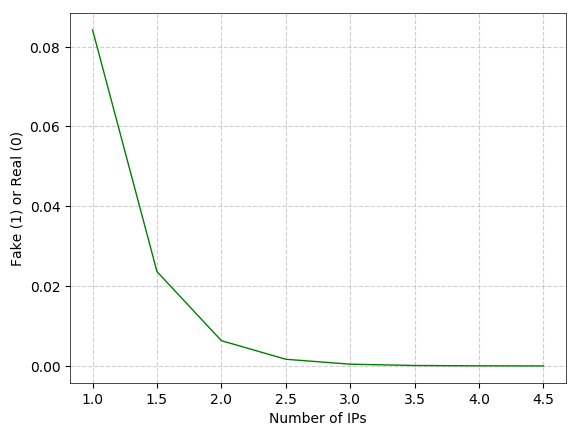

In [65]:
z = np.arange(1, 5, 0.5).reshape(-1, 1);
plt.plot(z, logistic_regression.predict_proba(z)[:, 1], color='green');
plt.ylabel("Fake (1) or Real (0)")
plt.xlabel("Number of IPs")
plt.grid(linestyle='--', alpha=0.6)
plt.show()

## Lab Experiments

1. What other features can you come up with/extract using Tweepy?
2. Can you try using other classifiers?